## Linear & Logistic Regression

In [57]:
#import packages

import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from mpl_toolkits import mplot3d
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# load data

df = pd.read_csv("cleanedData.csv")
df

,ID,IUCR,Location Description,Arrest,Domestic,Beat,District,FBI Code,Year,Date,Time,Month,Day,DayofWeek,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,INDEX CODE
0,5223506,2825,RESIDENCE,False,True,2122,2.0,26,2007,2007-01-03,10:00:00,Jan,3,Wednesday,OTHER OFFENSE,HARASSMENT BY TELEPHONE,N
1,5224416,1320,STREET,False,False,1323,12.0,14,2007,2007-01-04,18:00:00,Jan,4,Thursday,CRIMINAL DAMAGE,TO VEHICLE,N
2,5224520,5002,STREET,True,False,111,1.0,26,2007,2007-01-05,09:30:00,Jan,5,Friday,OTHER OFFENSE,OTHER VEHICLE OFFENSE,N
3,5225556,1320,STREET,False,False,111,1.0,14,2007,2007-01-05,19:00:00,Jan,5,Friday,CRIMINAL DAMAGE,TO VEHICLE,N
4,5227933,2024,STREET,True,False,2323,19.0,18,2007,2007-01-04,14:50:00,Jan,4,Thursday,NARCOTICS,POSS: HEROIN(WHITE),N
5,5227797,2094,SIDEWALK,True,False,1532,15.0,18,2007,2007-01-05,11:35:00,Jan,5,Friday,NARCOTICS,ATTEMPT POSSESSION CANNABIS,N
6,5242118,1811,STREET,True,False,2422,24.0,18,2007,2007-01-07,13:00:00,Jan,7,Sunday,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,N
7,5242417,0460,SIDEWALK,False,False,726,7.0,08B,2007,2007-01-13,01:39:10,Jan,13,Saturday,BATTERY,SIMPLE,U
8,5243014,0460,FACTORY/MANUFACTURING BUILDING,False,False,925,9.0,08B,2007,2007-01-13,09:00:00,Jan,13,Saturday,BATTERY,SIMPLE,U
9,5243687,0850,FACTORY/MANUFACTURING BUILDING,False,False,925,9.0,06,2007,2007-01-14,02:50:16,Jan,14,Sunday,THEFT,ATTEMPT THEFT,U


In [23]:
encoded_df = df.copy()

#creating datetime objects from the date and time cols
date = encoded_df['Date']
time = encoded_df['Time']
date_time = date + ' ' + time
dates_formatted = pd.to_datetime(date_time)
loc = encoded_df.columns.get_loc("Date")
encoded_df.insert(loc, "Date_Time",date_time)
encoded_df['Date_Time'] = dates_formatted.map(dt.datetime.toordinal)

#encode categorical data
categories = {'IUCR', 'Location Description', 'Arrest', 'FBI Code', 'PRIMARY DESCRIPTION', 'SECONDARY DESCRIPTION'}
#dictionary of encoded value to original value
encoded_map = {}
for i in categories:
    #label_encoder object knows how to understand word labels. 
    label_encoder = preprocessing.LabelEncoder() 
    temp = encoded_df[i]
    temp = label_encoder.fit_transform(temp) 
    loc = encoded_df.columns.get_loc(i)
    encoded_df.insert(loc, i + '_encoded',temp)
    dictionary = dict(zip(encoded_df[i + '_encoded'], encoded_df[i]))
    encoded_map[i] = dictionary

encoded_df

,ID,IUCR_encoded,IUCR,Location Description_encoded,Location Description,Arrest_encoded,Arrest,Domestic,Beat,District,...,Date,Time,Month,Day,DayofWeek,PRIMARY DESCRIPTION_encoded,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION_encoded,SECONDARY DESCRIPTION,INDEX CODE
0,5223506,303,2825,121,RESIDENCE,0,False,True,2122,2.0,...,2007-01-03,10:00:00,Jan,3,Wednesday,22,OTHER OFFENSE,169,HARASSMENT BY TELEPHONE,N
1,5224416,155,1320,141,STREET,0,False,False,1323,12.0,...,2007-01-04,18:00:00,Jan,4,Thursday,6,CRIMINAL DAMAGE,328,TO VEHICLE,N
2,5224520,359,5002,141,STREET,1,True,False,111,1.0,...,2007-01-05,09:30:00,Jan,5,Friday,22,OTHER OFFENSE,238,OTHER VEHICLE OFFENSE,N
3,5225556,155,1320,141,STREET,0,False,False,111,1.0,...,2007-01-05,19:00:00,Jan,5,Friday,6,CRIMINAL DAMAGE,328,TO VEHICLE,N
4,5227933,269,2024,141,STREET,1,True,False,2323,19.0,...,2007-01-04,14:50:00,Jan,4,Thursday,17,NARCOTICS,266,POSS: HEROIN(WHITE),N
5,5227797,289,2094,137,SIDEWALK,1,True,False,1532,15.0,...,2007-01-05,11:35:00,Jan,5,Friday,17,NARCOTICS,69,ATTEMPT POSSESSION CANNABIS,N
6,5242118,247,1811,141,STREET,1,True,False,2422,24.0,...,2007-01-07,13:00:00,Jan,7,Sunday,17,NARCOTICS,259,POSS: CANNABIS 30GMS OR LESS,N
7,5242417,40,0460,137,SIDEWALK,0,False,False,726,7.0,...,2007-01-13,01:39:10,Jan,13,Saturday,2,BATTERY,301,SIMPLE,U
8,5243014,40,0460,74,FACTORY/MANUFACTURING BUILDING,0,False,False,925,9.0,...,2007-01-13,09:00:00,Jan,13,Saturday,2,BATTERY,301,SIMPLE,U
9,5243687,93,0850,74,FACTORY/MANUFACTURING BUILDING,0,False,False,925,9.0,...,2007-01-14,02:50:16,Jan,14,Sunday,30,THEFT,71,ATTEMPT THEFT,U


In [51]:
encoded_df.nunique()


ID                               3423496
IUCR_encoded                         386
IUCR                                 386
Location Description_encoded         157
Location Description                 157
Arrest_encoded                         2
Arrest                                 2
Domestic                               2
Beat                                 303
District                              25
FBI Code_encoded                      26
FBI Code                              26
Year                                  10
Date_Time                           3653
Date                                3653
Time                               70070
Month                                 12
Day                                   31
DayofWeek                              7
PRIMARY DESCRIPTION_encoded           32
PRIMARY DESCRIPTION                   32
SECONDARY DESCRIPTION_encoded        364
SECONDARY DESCRIPTION                364
INDEX CODE                             3
dtype: int64

### Linear Regression

In [46]:
#linear regression model for IUCR, using Location and Time
y_data = encoded_df['IUCR_encoded']
x_data = encoded_df[['Location Description_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual IUCR code".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for Location Description_encoded is 0.12272574343944438
The coefficient for Date_Time is -0.002755298149450199
The intercept for our model is 2135.9551390337347
0.5504258637535341% of the variability in Y can be explained using X
On average we are 84.80813116032063 away from the actual IUCR code


In [42]:
#linear regression model for FBI Code, using Location and Time
y_data = encoded_df['FBI Code_encoded']
x_data = encoded_df[['Location Description_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual FBI code".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for Location Description_encoded is 0.005070264099568151
The coefficient for Date_Time is -0.0002263490435543532
The intercept for our model is 177.78537228425301
0.25469903353693146% of the variability in Y can be explained using X
On average we are 6.558266078721576 away from the actual IUCR code


In [43]:
#linear regression model for Primary Description, using Location and Time
y_data = encoded_df['PRIMARY DESCRIPTION_encoded']
x_data = encoded_df[['Location Description_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Primary Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for Location Description_encoded is 0.0296659772655897
The coefficient for Date_Time is 0.00014515401677451435
The intercept for our model is -95.50822242469481
1.4348136499678699% of the variability in Y can be explained using X
On average we are 11.164824553455139 away from the actual encoded Primary Description


In [85]:
#linear regression model for Location, using Crime and Time
y_data = encoded_df['Location Description_encoded']
x_data = encoded_df[['PRIMARY DESCRIPTION_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Location Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for PRIMARY DESCRIPTION_encoded is 0.47784006323082123
The coefficient for Date_Time is -0.0011869203852523818
The intercept for our model is 970.8915198730182
1.4851131402184747% of the variability in Y can be explained using X
On average we are 44.80537908474103 away from the actual encoded Location Description


In [86]:
#linear regression model for Location, using Crime and Time
y_data = encoded_df['Location Description_encoded']
x_data = encoded_df[['FBI Code_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Location Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for FBI Code_encoded is 0.240448576540935
The coefficient for Date_Time is -0.0010754940398892518
The intercept for our model is 892.9465917306734
0.19146897296179466% of the variability in Y can be explained using X
On average we are 45.06899255792438 away from the actual encoded Location Description


In [87]:
#linear regression model for Location, using Crime and Time
y_data = encoded_df['Location Description_encoded']
x_data = encoded_df[['IUCR_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Location Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for IUCR_encoded is 0.03453596223708761
The coefficient for Date_Time is -0.0010119982419653977
The intercept for our model is 844.887686457907
0.5040331204552605% of the variability in Y can be explained using X
On average we are 44.98611194991707 away from the actual encoded Location Description


Linear Regression isn't really good for predicting what crimes will occur at a certain location and time, bc both the location and crime type is a categorical data, that when encoded puts an implication that the higher the number (code) the category is given the more important it is. But in reality all categories are equal in importance. 

### Logistic Regression

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The coefficient for IUCR_encoded is 0.006041082122313634
The coefficient for Location Description_encoded is 0.00035222464223146185
The coefficient for Date_Time is -3.6171097699275174e-06
The coefficient for PRIMARY DESCRIPTION_encoded is 5.443879184883353e-05
The coefficient for SECONDARY DESCRIPTION_encoded is 0.003672684203142958


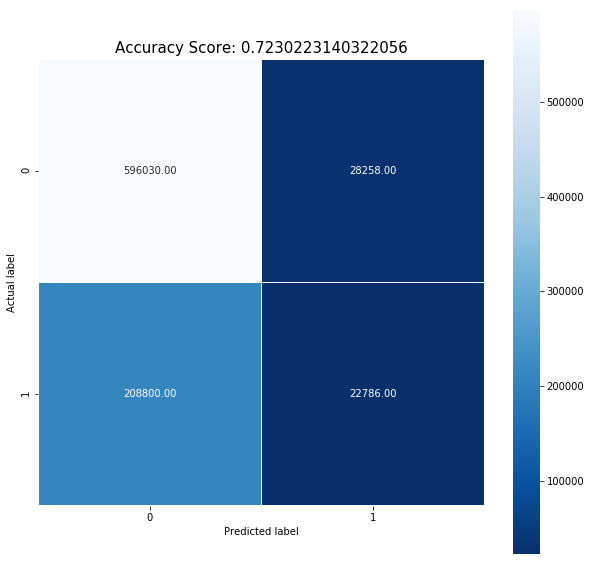

In [70]:
#logistic regression model for arrest rate, using all other data
x_data = encoded_df[['IUCR_encoded','Location Description_encoded','Date_Time','PRIMARY DESCRIPTION_encoded','SECONDARY DESCRIPTION_encoded']]
y_data = encoded_df['Arrest_encoded']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, logisticRegr.coef_[0][idx]))

score = logisticRegr.score(x_test, y_test)
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The coefficient for Location Description_encoded is -1.3175921394683055e-09
The coefficient for Date_Time is -8.906669468584826e-06


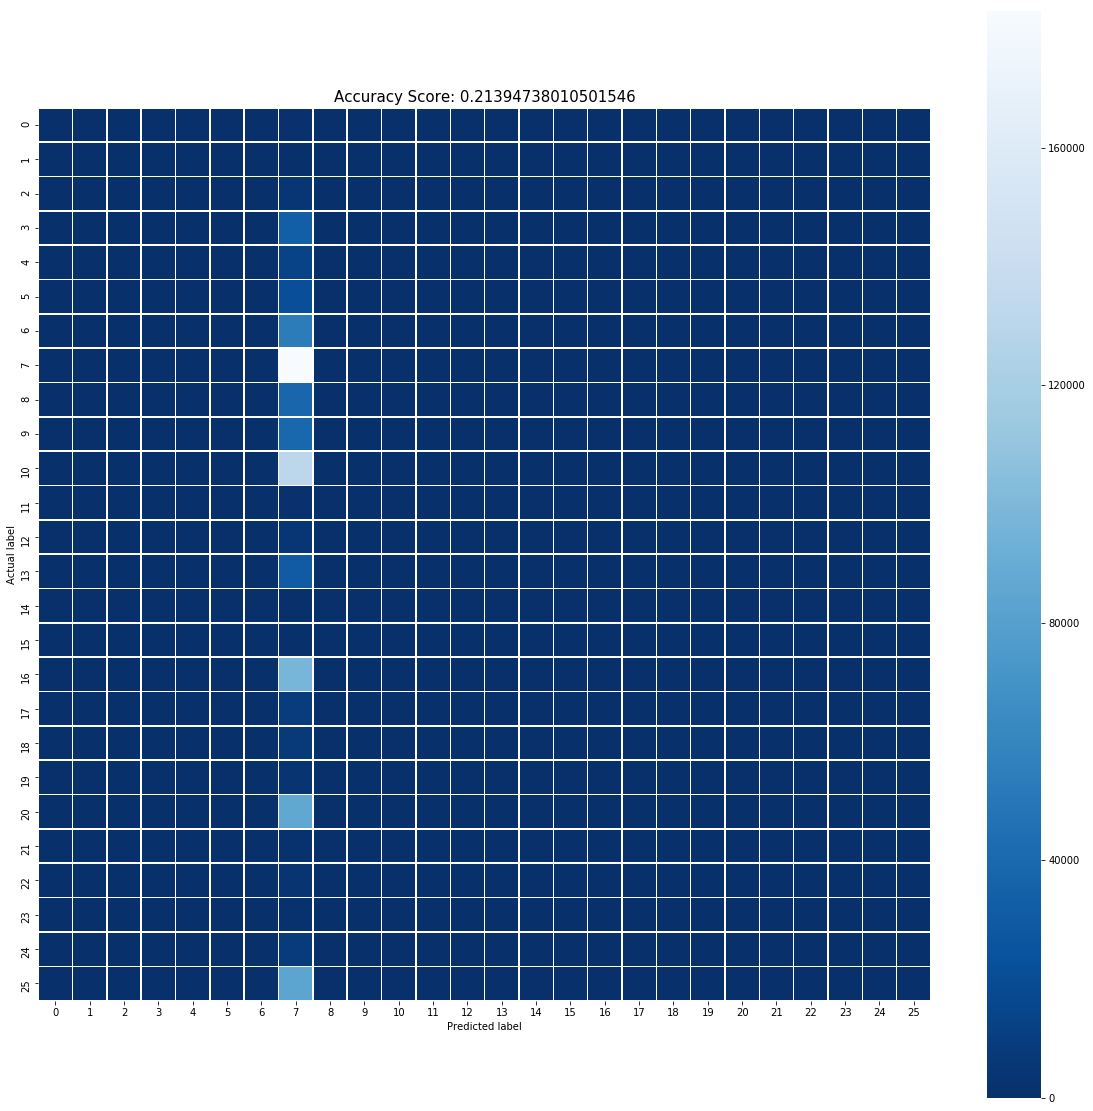

In [71]:
#logistic regression model for FBI Code, using Location and Time
x_data = encoded_df[['Location Description_encoded','Date_Time']]
y_data = encoded_df['FBI Code_encoded']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, logisticRegr.coef_[0][idx]))

score = logisticRegr.score(x_test, y_test)
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Logistic Regression is better for categorical data modelling, but since the crimy types have too many categries it is still a very inaccurate model. 

In [73]:
#categorizing location into 4 categories:  1. Residential Area, 2.Public Open Space, 3. Non-Resid Buildings 4. Transporatation, 0.OTHER
loca  = encoded_df['Location Description']
encoded_df.loc[:, 'Loca Num'] = np.where( loca.str.contains('RESIDEN')
                                    |loca.str.contains('APARTMENT'), 1,
                                    np.where(loca.str.contains('STREET')
                                             |loca.str.contains('SIDEWALK')
                                             |loca.str.contains('STATION')
                                             |loca.str.contains('LOT')
                                             |loca.str.contains('ALLEY')
                                             |loca.str.contains('PLATFORM')
                                             |loca.str.contains('HIGHWAY')
                                             |loca.str.contains('BRIDGE')
                                             |loca.str.contains('LAKEFRONT')
                                             |loca.str.contains('FOREST')
                                             |loca.str.contains('LAKE')
                                             |loca.str.contains('RIVER')
                                             |loca.str.contains('PARK'), 2,
                                             np.where(loca.str.contains('BUILDING')
                                                      |loca.str.contains('STORE')
                                                      |loca.str.contains('RESTAURANT')
                                                      |loca.str.contains('SCHOOL')
                                                      |loca.str.contains('OFFICE')
                                                      |loca.str.contains('HOTEL')
                                                      |loca.str.contains('BANK')
                                                      |loca.str.contains('CONSTRUCTION SITE')
                                                      |loca.str.contains('CLUB')
                                                      |loca.str.contains('BARBERSHOP')
                                                      |loca.str.contains('COLLEGE')
                                                      |loca.str.contains('LIBRARY')
                                                      |loca.str.contains('ATM')
                                                      |loca.str.contains('CENTER')
                                                      |loca.str.contains('THEATER')
                                                      |loca.str.contains('CHURCH')
                                                      |loca.str.contains('STADIUM')
                                                      |loca.str.contains('FACILITY')
                                                      |loca.str.contains('SHOP')
                                                      |loca.str.contains('HOSPITAL')
                                                      |loca.str.contains('CREDIT UNION')
                                                      |loca.str.contains('MOTEL')
                                                      |loca.str.contains('AIRPORT')
                                                      |loca.str.contains('FACTORY')
                                                      |loca.str.contains('ROOM')
                                                      |loca.str.contains('BAR'), 3,
                                                      np.where( loca.str.contains('TRANSPORTATION')
                                                                |loca.str.contains('TRUCK')
                                                                |loca.str.contains('BUS')
                                                                |loca.str.contains('TAXICAB')
                                                                |loca.str.contains('VEHICLE')
                                                                |loca.str.contains('TRAIN'), 4,
                                                                0))))

### Linear and Logistic Regression w/ Loca Num

In [78]:
#linear regression model for IUCR, using Location and Time
y_data = encoded_df['IUCR_encoded']
x_data = encoded_df[['Loca Num','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual IUCR code".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for Loca Num is -1.185077472362378
The coefficient for Date_Time is -0.002882085916067085
The intercept for our model is 2244.1795149467957
0.13999933649685437% of the variability in Y can be explained using X
On average we are 84.97732788153161 away from the actual IUCR code


In [76]:
#linear regression model for FBI Code, using Location and Time
y_data = encoded_df['FBI Code_encoded']
x_data = encoded_df[['Loca Num','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual FBI code".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for Loca Num is -0.32185154946907685
The coefficient for Date_Time is -0.00022708845262636355
The intercept for our model is 179.4314113494389
0.3096697182943253% of the variability in Y can be explained using X
On average we are 6.562469441947353 away from the actual FBI code


In [80]:
#linear regression model for Primary Description, using Location and Time
y_data = encoded_df['PRIMARY DESCRIPTION_encoded']
x_data = encoded_df[['Loca Num','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Primary Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

The coefficient for Loca Num is 2.498409008630117
The coefficient for Date_Time is 0.00011985662919719256
The intercept for our model is -78.19133575817165
3.637664297751164% of the variability in Y can be explained using X
On average we are 11.03734447295966 away from the actual encoded Primary Description


In [ ]:
#linear regression model for Location, using Crime and Time
y_data = encoded_df['Loca Num']
x_data = encoded_df[['PRIMARY DESCRIPTION_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Location Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

In [ ]:
#linear regression model for Location, using Crime and Time
y_data = encoded_df['Loca Num']
x_data = encoded_df[['FBI Code_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Location Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

In [ ]:
#linear regression model for Location, using Crime and Time
y_data = encoded_df['Loca Num']
x_data = encoded_df[['IUCR_encoded','Date_Time']]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

score = regression_model.score(x_test, y_test) * 100
print("{}% of the variability in Y can be explained using X".format(score))

y_predict = regression_model.predict(x_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse = math.sqrt(regression_model_mse)
print("On average we are {} away from the actual encoded Location Description".format(regression_model_mse))

#print("Example: ")
#regression_model.predict([[113,732698]])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The coefficient for IUCR_encoded is 0.006042459417698315
The coefficient for Loca Num is 2.7929798067040448e-05
The coefficient for Date_Time is -3.569896687230688e-06
The coefficient for PRIMARY DESCRIPTION_encoded is 5.516475400307271e-05
The coefficient for SECONDARY DESCRIPTION_encoded is 0.003684291116041031


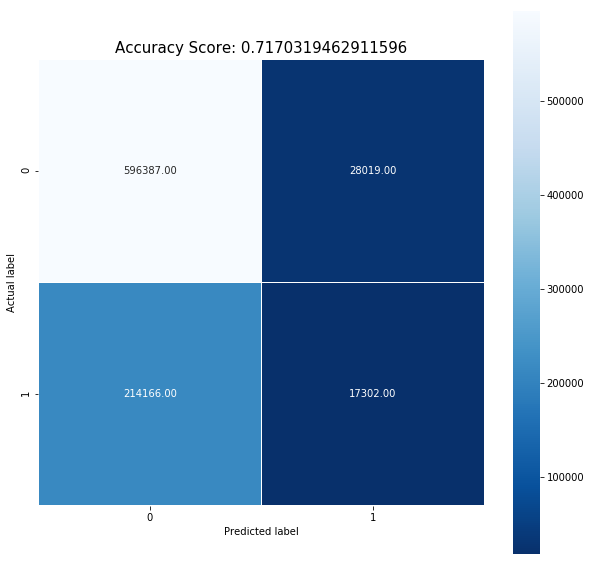

In [81]:
#logistic regression model for arrest rate, using all other data
x_data = encoded_df[['IUCR_encoded','Loca Num','Date_Time','PRIMARY DESCRIPTION_encoded','SECONDARY DESCRIPTION_encoded']]
y_data = encoded_df['Arrest_encoded']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, logisticRegr.coef_[0][idx]))

score = logisticRegr.score(x_test, y_test)
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The coefficient for Loca Num is -2.3829682176653888e-11
The coefficient for Date_Time is -8.920019244690759e-06


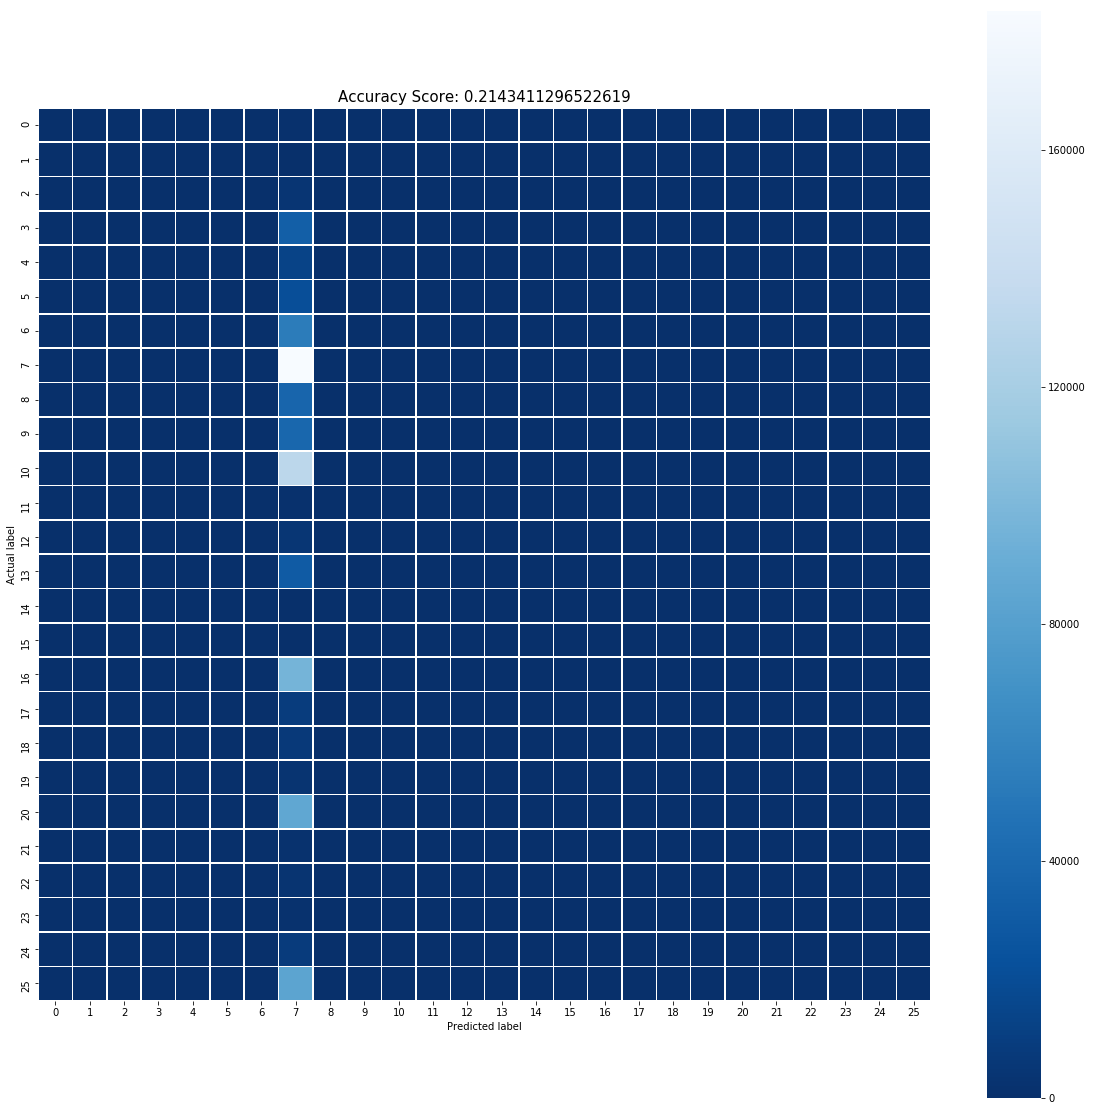

In [82]:
#logistic regression model for FBI Code, using Location and Time
x_data = encoded_df[['Loca Num','Date_Time']]
y_data = encoded_df['FBI Code_encoded']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, logisticRegr.coef_[0][idx]))

score = logisticRegr.score(x_test, y_test)
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#logistic regression model for Location, using other data
x_data = encoded_df[['IUCR_encoded','Arrest_encoded','Date_Time','PRIMARY DESCRIPTION_encoded','SECONDARY DESCRIPTION_encoded']]
y_data = encoded_df['Loca Num']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, logisticRegr.coef_[0][idx]))

score = logisticRegr.score(x_test, y_test)
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(20,20))
sns.heatmap(cm, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);